In [42]:
!pip install requests

In [43]:
import requests
from collections import Counter

In [44]:
def getPhenotypes(url, gene):
    url = url.format(gene)
    d = requests.get(url).json()
    phenotypes = []
    for i in d['associations']:
        phenotypes.append(i['object']['id'])
    return phenotypes

In [45]:
def getAssociations(url, gene):
    url = url.format(gene)
    d = requests.get(url).json()
    assocs = []
    for i in d['associations']:
        assocs.append(i['object']['id'])
    return assocs

In [46]:
genes = ['HGNC:17111',
 'HGNC:1366',
 'HGNC:11133',
 'HGNC:1160',
 'HGNC:17109',
 'HGNC:7223',
 'HGNC:219',
 'HGNC:13202',
 'HGNC:2860',
 'HGNC:7224',
 'HGNC:445',
 'HGNC:9081',
 'HGNC:15492',
 'HGNC:17870',
 'HGNC:9364',
 'HGNC:2037',
 'HGNC:2073',
 'HGNC:360',
 'HGNC:9023',
 'HGNC:2201']

In [47]:
import matplotlib.pyplot as plt

In [48]:
def plotTopResults(allResults):
    counts1 = Counter(allResults)
    counts = {k: v for k, v in counts1.items() if int(v)> 1}
    counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=False)[:15])

    names = list(counts.keys())
    values = list(counts.values())
    names
    plt.bar(range(len(counts)), values)
    plt.xticks(range(len(counts)), names, rotation='vertical')
    plt.show()

In [49]:
monarchURL = 'https://api.monarchinitiative.org/api/'
phenotypeURL = monarchURL + 'bioentity/gene/{}/phenotypes'
anatomyURL = monarchURL + 'bioentity/gene/{}/anatomy'
interactionsURL = monarchURL + 'bioentity/gene/{}/interactions'
diseaseURL = monarchURL + 'bioentity/gene/{}/diseases'


In [50]:
allPhenotypes = []
for gene in genes:
    phenotypes = getPhenotypes(phenotypeURL, gene)
    allPhenotypes.extend(phenotypes)
    

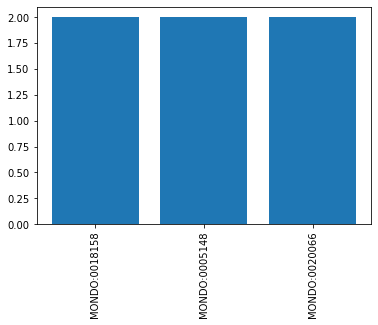

In [51]:
allDiseases = []
for gene in genes:
    diseases = getAssociations(diseaseURL, gene)
    allDiseases.extend(diseases)
plotTopResults(allDiseases)

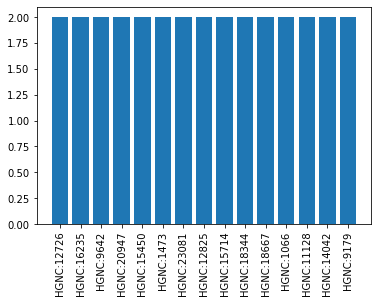

In [52]:
allInters = []
for gene in genes:
    interactions = getAssociations(interactionsURL, gene)
    allInters.extend(interactions)

plotTopResults(allInters)

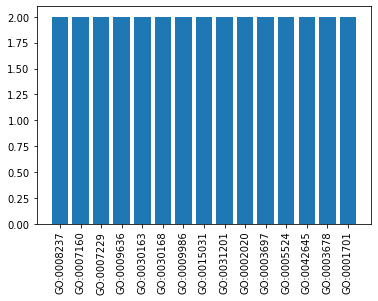

In [53]:
goAPI = 'http://api.geneontology.org/api'
callID = goAPI + '/bioentity/gene/{}/function'
allFunctions = []
for gene in genes:
    fxs = getAssociations(callID, gene)
    allFunctions.extend(fxs)

plotTopResults(allFunctions)
